# Importing All The Important Libraries



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [3]:
df=pd.read_csv(r"E:\marij personal projects\Python Projects new\Project 5\yellow_tripdata_2020-01.csv")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.2,1.0,N,238,239,1.0,6.0,3.0,0.5,1.47,0.0,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.2,1.0,N,239,238,1.0,7.0,3.0,0.5,1.50,0.0,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.6,1.0,N,238,238,1.0,6.0,3.0,0.5,1.00,0.0,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.8,1.0,N,238,151,1.0,5.5,0.5,0.5,1.36,0.0,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.0,1.0,N,193,193,2.0,3.5,0.5,0.5,0.00,0.0,0.3,4.80,0.0


In [4]:
df.dtypes

VendorID                 float64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count          float64
trip_distance            float64
RatecodeID               float64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type             float64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
congestion_surcharge     float64
dtype: object

In [5]:
#lets change the data type of pick up and drop time columns

df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [6]:
# lets findout the duration of the ride
df['Duration']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']
#lets change our duration column values into minutes
df['Duration']=df['Duration'].dt.total_seconds()/60

In [7]:
#extracting the important column from our dataframe
df=df[['Duration','payment_type','fare_amount','trip_distance','passenger_count']]

In [8]:
# finding the number of null values in our data

df.isnull().sum()

Duration               0
payment_type       65441
fare_amount            0
trip_distance          0
passenger_count    65441
dtype: int64

In [9]:
#dropping the null values

df.dropna(inplace=True)

In [10]:
df

,Duration,payment_type,fare_amount,trip_distance,passenger_count
0,4.800000,1.0,6.0,1.20,1.0
1,7.416667,1.0,7.0,1.20,1.0
2,6.183333,1.0,6.0,0.60,1.0
3,4.850000,1.0,5.5,0.80,1.0
4,2.300000,2.0,3.5,0.00,1.0
...,...,...,...,...,...
6339562,14.233333,1.0,11.0,2.10,1.0
6339563,19.000000,1.0,13.0,2.13,1.0
6339564,16.283333,1.0,12.5,2.55,1.0
6339565,9.633333,2.0,8.5,1.61,1.0


In [11]:
# converting payment_type and passenger_count data type into integer

df['passenger_count']=df['passenger_count'].astype('int64')
df['payment_type']=df['payment_type'].astype('int64')

In [12]:
# removing the duplicate values

df.drop_duplicates(inplace=True)

In [13]:
df

,Duration,payment_type,fare_amount,trip_distance,passenger_count
0,4.800000,1,6.0,1.20,1
1,7.416667,1,7.0,1.20,1
2,6.183333,1,6.0,0.60,1
3,4.850000,1,5.5,0.80,1
4,2.300000,2,3.5,0.00,1
...,...,...,...,...,...
6339555,14.800000,1,10.0,2.09,3
6339561,21.500000,1,17.5,4.11,1
6339563,19.000000,1,13.0,2.13,1
6339564,16.283333,1,12.5,2.55,1


In [14]:
#finding the outliers in our passenger_count column
df['passenger_count'].value_counts(normalize=True)

1    0.581981
2    0.190350
3    0.066360
5    0.062937
6    0.039272
4    0.036046
0    0.023033
7    0.000009
9    0.000006
8    0.000006
Name: passenger_count, dtype: float64

In [15]:
#since few passenger_count values are contributing less to our data so we are going to remove them

df=df[(df['passenger_count']>0) & (df['passenger_count']<6)]

In [16]:
# since payment_type values represent the payment methods and 1,2 represent cash 
#and card method so we are going to choose just 1 and 2

df=df[df['payment_type']<3]

In [17]:
# now replacing the 1,2 values of payment_type with card and cash

df['payment_type'].replace([1,2],['Card','Cash'],inplace=True)

In [18]:
df.describe()

,Duration,fare_amount,trip_distance,passenger_count
count,2.780283e+06,2.780283e+06,2.780283e+06,2.780283e+06
mean,2.415478e+01,1.780567e+01,4.536729e+00,1.733386e+00
std,9.260031e+01,1.506997e+01,4.895890e+00,1.176652e+00
min,-2.770367e+03,-5.000000e+02,-2.218000e+01,1.000000e+00
25%,9.883333e+00,9.000000e+00,1.500000e+00,1.000000e+00
50%,1.573333e+01,1.300000e+01,2.730000e+00,1.000000e+00
75%,2.336667e+01,2.100000e+01,5.470000e+00,2.000000e+00
max,8.525117e+03,4.265000e+03,2.628800e+02,5.000000e+00


In [19]:
df.shape

(2780283, 5)

In [20]:
# after doing descriptive analysis above we find out that there is some wrong values in our data .
# so we are going to remove it

df=df[df['fare_amount']>0]
df=df[df['Duration']>0]
df=df[df['trip_distance']>0]


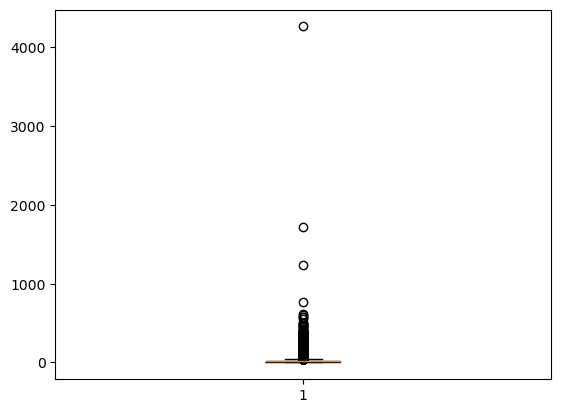

In [21]:
# this visualiztion is indicating that there are outliers in our data 
plt.boxplot(df['fare_amount']);

In [22]:
# now we are going to remove outliers by using IQR method

for col in ('fare_amount','Duration','trip_distance'):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    IQR=q3-q1
    
    lower_bound=q1-1.5*IQR
    upper_bound=q3-1.5+IQR
    
    df=df[(df[col]>=lower_bound) & (df[col]<=upper_bound)]

In [23]:
df

,Duration,payment_type,fare_amount,trip_distance,passenger_count
0,4.800000,Card,6.0,1.20,1
1,7.416667,Card,7.0,1.20,1
2,6.183333,Card,6.0,0.60,1
3,4.850000,Card,5.5,0.80,1
5,0.883333,Cash,2.5,0.03,1
...,...,...,...,...,...
6339550,12.383333,Card,10.5,2.40,4
6339555,14.800000,Card,10.0,2.09,3
6339561,21.500000,Card,17.5,4.11,1
6339563,19.000000,Card,13.0,2.13,1


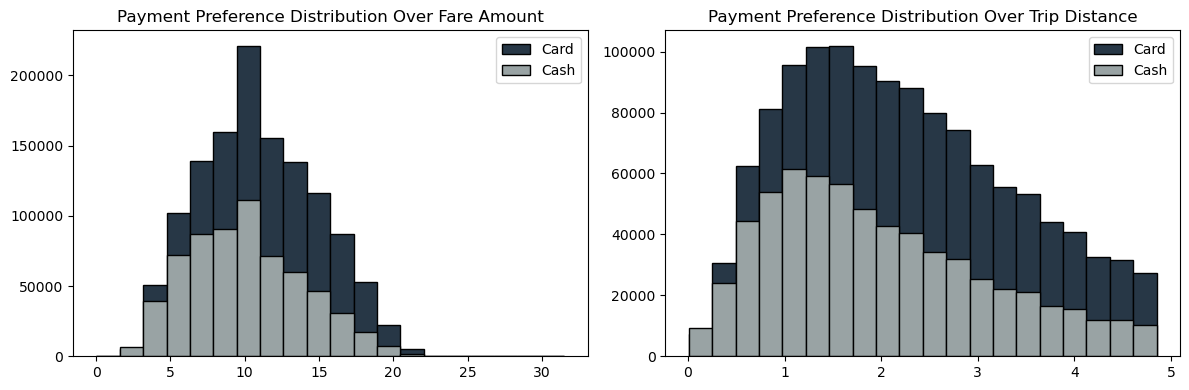

In [24]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('Payment Preference Distribution Over Fare Amount')
plt.hist(df[df['payment_type']=='Card']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#273746',label='Card')
plt.hist(df[df['payment_type']=='Cash']['fare_amount'],histtype='barstacked',bins=20,edgecolor='k',color='#99A3A4',label='Cash')
plt.legend()



plt.subplot(1,2,2)
plt.title('Payment Preference Distribution Over Trip Distance')
plt.hist(df[df['payment_type']=='Card']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#273746',label='Card')
plt.hist(df[df['payment_type']=='Cash']['trip_distance'],histtype='barstacked',bins=20,edgecolor='k',color='#99A3A4',label='Cash')
plt.legend()

plt.tight_layout()
plt.show()

# after visualizing our plots we can visually see that people are choosing card over cash in both parameters

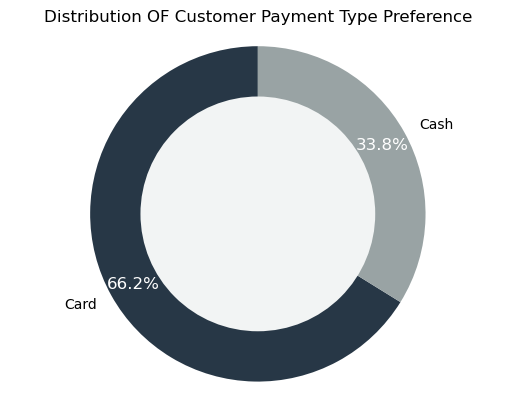

In [25]:
import matplotlib.pyplot as plt

labels = df['payment_type'].value_counts().index
sizes = df['payment_type'].value_counts(normalize=True)
colors = ['#273746', '#99A3A4']

# Create the pie chart
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(sizes, labels=labels, colors=colors, startangle=90, wedgeprops={'width': 0.5}, autopct='%1.1f%%', pctdistance=0.85)

# Equal aspect ratio ensures that pie is drawn as a circle.
ax.axis('equal')

# Add a white circle at the center to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='#F2F4F4')
fig.gca().add_artist(centre_circle)

# Customize the autotexts (percentages)
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(12)

plt.title('Distribution OF Customer Payment Type Preference')
plt.show()


In [26]:
passenger_count=df.groupby(['payment_type','passenger_count'])[['passenger_count']].count()
passenger_count.rename(columns={'passenger_count':'count'},inplace=True)
passenger_count.reset_index(inplace=True)


In [27]:
passenger_count['percentage']=(passenger_count['count']/passenger_count['count'].sum())*100

In [28]:
passenger_count

,payment_type,passenger_count,count,percentage
0,Card,1,694646,36.623829
1,Card,2,280892,14.809472
2,Card,3,110275,5.814030
3,Card,4,57979,3.056827
4,Card,5,111488,5.877983
5,Cash,1,381875,20.133600
6,Cash,2,137276,7.237604
7,Cash,3,49326,2.600615
8,Cash,4,29724,1.567139
9,Cash,5,43224,2.278899


In [29]:
df_2=pd.DataFrame(columns=['payment_type',1,2,3,4,5])
df_2['payment_type']=['Card','Cash']
df_2.iloc[0,1:]=passenger_count.iloc[0:5,-1]
df_2.iloc[1,1:]=passenger_count.iloc[5:,-1]
df_2

,payment_type,1,2,3,4,5
0,Card,36.623829,14.809472,5.81403,3.056827,5.877983
1,Cash,20.1336,7.237604,2.600615,1.567139,2.278899


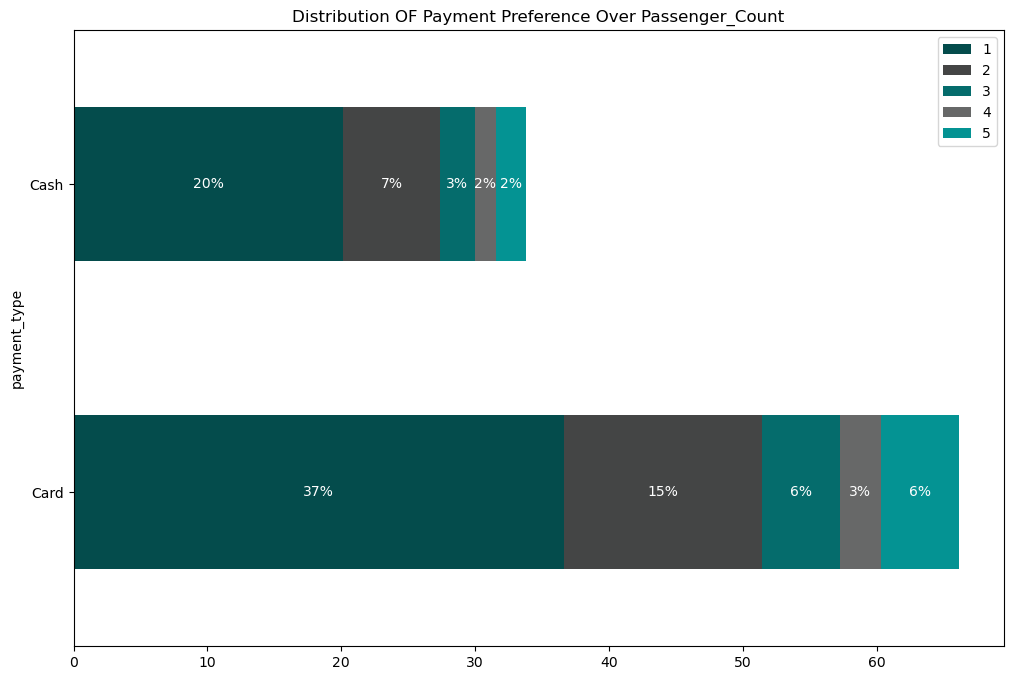

In [30]:


# Plotting the stacked horizontal bar chart
ax = df_2.plot(x='payment_type', kind='barh', stacked=True, color=['#044C4C','#444545','#056C6C','#676868','#049393'], figsize=(12, 8))

# Add percentage text
for bars in ax.containers:
    # Adding text to each segment in the stack
    for bar in bars:
        width = bar.get_width()
        height = bar.get_height()
        x = bar.get_x() + width / 2
        y = bar.get_y() + height / 2
        if width > 0:  # Only add text to segments with a positive width
            ax.text(x, y, '{:.0f}%'.format(width), 
                    ha='center', va='center', color='white')

            
plt.title('Distribution OF Payment Preference Over Passenger_Count')
plt.show()


# Null Hypothesis

There is no difference in average fare amount between those customers who use credit cash and card

# Alternate Hypothesis 

There is no difference in average fare amount between those customers who use credit cash and card

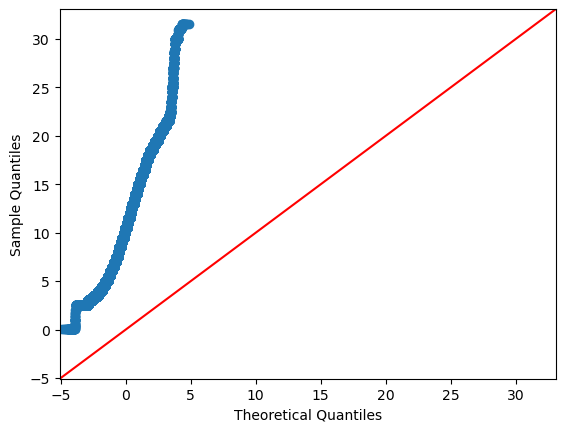

In [31]:
# inorder to find whether the data is normally distributed or not so we are going to plot qqplot
sm.qqplot(df['fare_amount'],line='45')
plt.show()

# it is clear that our data is not normally distributed by the visualization

In [34]:
card_sample=df[df['payment_type']=='Card']['fare_amount']
cash_sample=df[df['payment_type']=='Cash']['fare_amount']

In [35]:
t_stats,p_value=st.ttest_ind(a=card_sample,b=cash_sample,equal_var=False)
print('T statistics',t_stats,'P_Value',p_value)

T statistics 154.1403469771133 P_Value 0.0


In [ ]:
# Since p value is less than 0.05 so we are going to reject alterante hypothesis